# Weather dataset analysis

This notebook analyzes the **Weather dataset**, exploring its structure, performing preprocessing, and visualizing the time series data.  


## **1. Library imports**

In [11]:
import sys
import os
sys.path.append(os.path.abspath('../../'))
from data.utils import *

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **2. Dataset overview**

### **Loading the dataset**

In [13]:
# Dataset names : exchange_rate.csv , electricity.csv , ETTm2.csv , national_illness.csv , traffic.csv , weather.csv
df = pd.read_csv("../../data/all_six_dataset/weather/weather.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  52696 non-null  object 
 1   p (mbar)              52696 non-null  float64
 2   T (degC)              52696 non-null  float64
 3   Tpot (K)              52696 non-null  float64
 4   Tdew (degC)           52696 non-null  float64
 5   rh (%)                52696 non-null  float64
 6   VPmax (mbar)          52696 non-null  float64
 7   VPact (mbar)          52696 non-null  float64
 8   VPdef (mbar)          52696 non-null  float64
 9   sh (g/kg)             52696 non-null  float64
 10  H2OC (mmol/mol)       52696 non-null  float64
 11  rho (g/m**3)          52696 non-null  float64
 12  wv (m/s)              52696 non-null  float64
 13  max. wv (m/s)         52696 non-null  float64
 14  wd (deg)              52696 non-null  float64
 15  rain (mm)          


### **Column descriptions**

This dataset contains time series data of various meteorological and atmospheric measurements recorded at regular intervals.

| **Column Name**      | **Description**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| `date`               | Timestamp of the observation (recorded every 10 minutes).                       |
| `p (mbar)`           | Air pressure in millibars.                                                      |
| `T (degC)`           | Ambient temperature in degrees Celsius.                                         |
| `Tpot (K)`           | Potential temperature in Kelvin.                                                |
| `Tdew (degC)`        | Dew point temperature in degrees Celsius.                                       |
| `rh (%)`             | Relative humidity as a percentage.                                              |
| `VPmax (mbar)`       | Maximum vapor pressure in millibars.                                            |
| `VPact (mbar)`       | Actual vapor pressure in millibars.                                             |
| `VPdef (mbar)`       | Vapor pressure deficit in millibars.                                            |
| `sh (g/kg)`          | Specific humidity in grams per kilogram.                                        |
| `H2OC (mmol/mol)`    | Water vapor concentration in millimoles per mole.                               |
| `rho (g/m**3)`       | Air density in grams per cubic meter.                                           |
| `wv (m/s)`           | Wind velocity in meters per second.                                             |
| `max. wv (m/s)`      | Maximum wind velocity in meters per second.                                     |
| `wd (deg)`           | Wind direction in degrees.                                                      |
| `rain (mm)`          | Rainfall amount in millimeters.                                                 |
| `raining (s)`        | Duration of rainfall in seconds.                                                |
| `SWDR (W/m²)`        | Short-wave downward radiation in watts per square meter.                        |
| `PAR (µmol/m²/s)`    | Photosynthetically Active Radiation (PAR) in micromoles per square meter per second. |
| `max. PAR (µmol/m²/s)`| Maximum Photosynthetically Active Radiation in micromoles per square meter per second. |
| `Tlog (degC)`        | Logarithmic representation of temperature in degrees Celsius.                   |
| `OT`                 | Additional metadata    |

## **3. Preprocessing the data**

### **Convert and set date as index**

In [14]:
df = convert_date(df)
df.set_index('date', inplace=True)
df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m�)',
       'PAR (�mol/m�/s)', 'max. PAR (�mol/m�/s)', 'Tlog (degC)', 'OT'],
      dtype='object')

**Frequency and summary:**
- Frequency: 10 minutes
- Time series : 21
- Total observations: 1,106,595
- Test observations: 221,319
- Rolled forecast data points: 1.59e8
- Horizon: {96, 192, 336, 720}



## **4. Visualizing the Dataset**

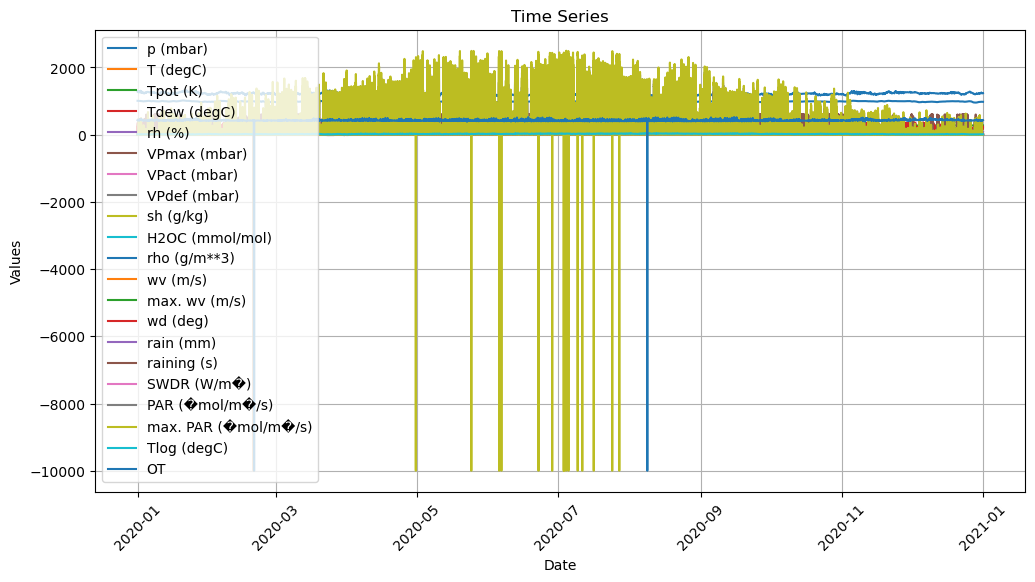

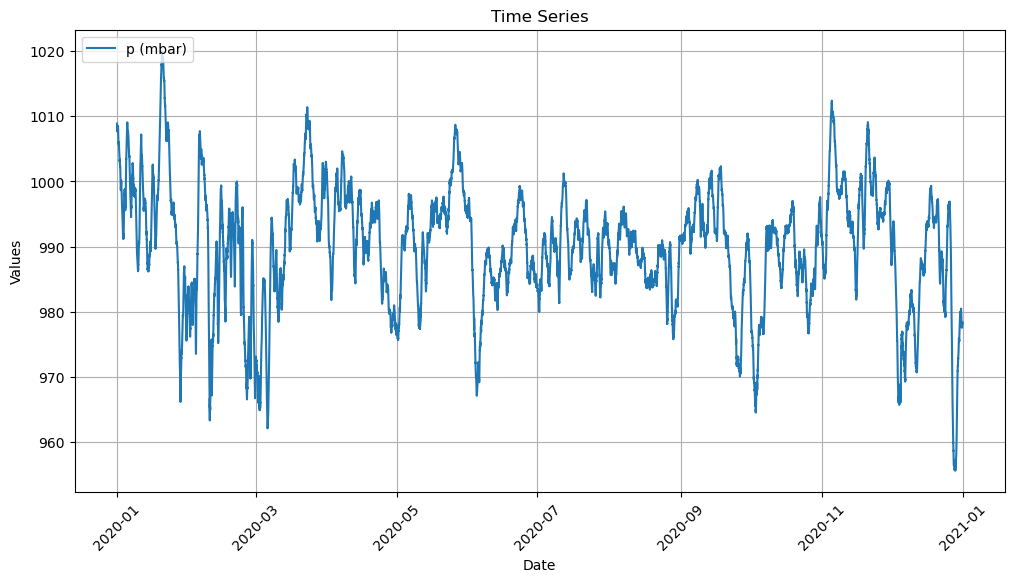

In [15]:
plot_time_series(df) # Plot all columns of the dataset
plot_time_series(df, column='p (mbar)')  # Plot a specific column

## **5. Splitting the Dataset**

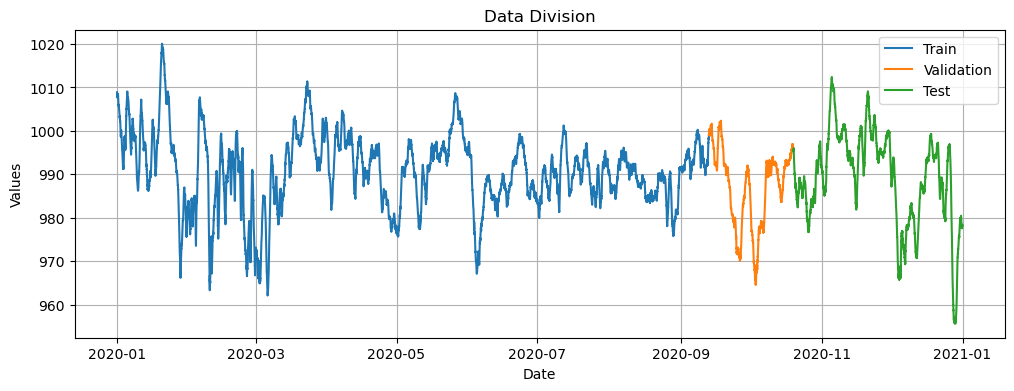

In [16]:
train, valid, test = split_data(df)
plot_data_split(train, valid, test, 'p (mbar)')